# Spam Erkennung

Dieses Beispiel dient der Erläuterung der Idee des Maschinellen Lernens anhand eines Klassifikationsproblems.
Der verwendete Datensatz stammt von Shmueli et al. (Machine Learning for Business Analytics) und ist ein bereits vorverarbeiteter Datensatz. Der Originaldatensatz ist die *SpamBase* von UC Irvine (https://archive-beta.ics.uci.edu/dataset/94/spambase)

In [6]:
#Nur einmalig ausführen, dann auskommentieren
%pip install -q plotnine

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn 
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from plotnine import *
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
spambase = pd.read_csv('spambase.csv')

In [9]:
spambase.head()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
spambase.tail()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [11]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   W_3d        4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [12]:
spambase.describe()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [13]:
spambase["Spam"]

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: Spam, Length: 4601, dtype: int64

In [14]:
spambase["Spam"].value_counts()

Spam
0    2788
1    1813
Name: count, dtype: int64

In [15]:
spambase_prep = spambase.astype({'Spam': 'category'})

In [16]:
spambase_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   make        4601 non-null   float64 
 1   address     4601 non-null   float64 
 2   all         4601 non-null   float64 
 3   W_3d        4601 non-null   float64 
 4   our         4601 non-null   float64 
 5   over        4601 non-null   float64 
 6   remove      4601 non-null   float64 
 7   internet    4601 non-null   float64 
 8   order       4601 non-null   float64 
 9   mail        4601 non-null   float64 
 10  receive     4601 non-null   float64 
 11  will        4601 non-null   float64 
 12  people      4601 non-null   float64 
 13  report      4601 non-null   float64 
 14  addresses   4601 non-null   float64 
 15  free        4601 non-null   float64 
 16  business    4601 non-null   float64 
 17  email       4601 non-null   float64 
 18  you         4601 non-null   float64 
 19  credit

/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 69 rows containing non-finite values.
/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 5 rows containing missing values.


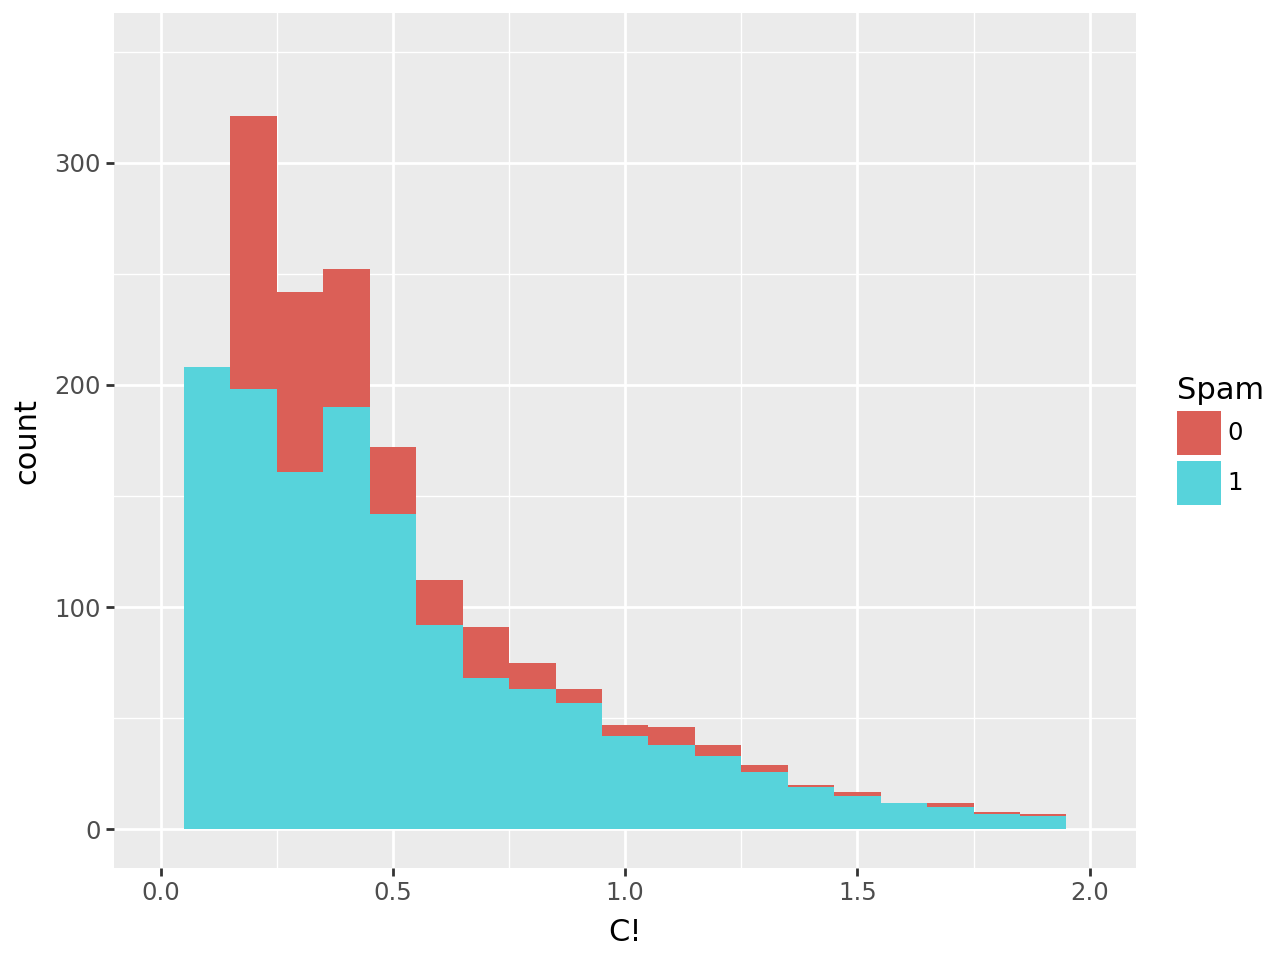

In [17]:
(ggplot(spambase_prep, aes('C!', fill = 'Spam'))
    + geom_histogram(binwidth = 0.1)
    + xlim(0,2)
    + ylim(0,350)
)

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(spambase_prep, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
X_train = train_set.iloc[:,0:57]
y_train = train_set.loc[:,'Spam']
X_test = test_set.iloc[:,0:57]
y_test = test_set.loc[:,'Spam']

In [21]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [22]:
y_test_pred = tree_clf.predict(X_test)

In [23]:
y_test

3683    0
4412    0
2584    0
69      1
1844    0
       ..
1068    1
4351    0
3027    0
3455    0
1898    0
Name: Spam, Length: 921, dtype: category
Categories (2, int64): [0, 1]

In [24]:
from sklearn.metrics import confusion_matrix
        
confusion_matrix(y_test, y_test_pred)

array([[513,  18],
       [121, 269]], dtype=int64)

In [25]:
fn = X_train.columns

In [26]:
from sklearn import tree


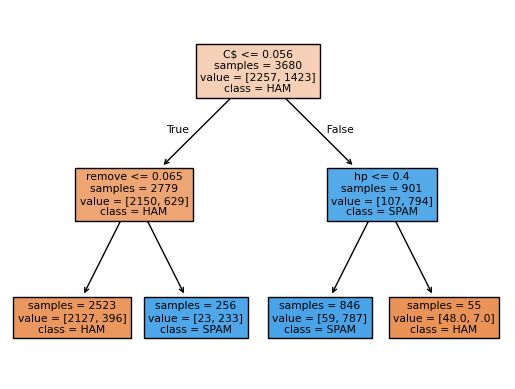

In [28]:
tree.plot_tree(tree_clf, feature_names = fn, class_names = ["HAM","SPAM"], filled = True, impurity = False)
plt.show()

In [29]:
y_train_pred = tree_clf.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[2175,   82],
       [ 403, 1020]], dtype=int64)